### Light Reactions

2 H$_2$O + 8 $\gamma$ + 2 NADP + 3 ADP + 3 P$_i$ $\rightarrow$ O$_2$ + 3 ATP + 2 NADPH

### Dark Reactions

6 CO$_2$ + 6 H$_2$O + 6 RuBP + 12 ATP $\rightarrow$ 12 1,3-BPG + 12 ADP

12 1,3-BGP + 12 NADPH $\rightarrow$ 12 NADP + 12 G3P + 12 P$_i$

5 G3P $\rightarrow$ 5 DHAP

3 G3P + 3 DHAP $\rightarrow$ 3 FBP

3 FBP + 3 H$_2$O $\rightarrow$ 3 F6P + 3 P$_i$

1 F6P $\rightarrow$ 1 G6P

1 G6P + 1 H$_2$O $\rightarrow$ 1 Glucose + 1 P$_i$

2 F6P + 2 G3P $\rightarrow$ 2 Xu5P + 2 E4P

2 E4P + 2 DHAP $\rightarrow$ 2 SBP

2 SBP + 2 H$_2$O + 2 G3P $\rightarrow$ 4 Ru5P + 2 P$_i$

6 Ru5P + 6 ATP $\rightarrow$ 6 RuBP + 6 ADP


#### Net

6 CO$_2$ + 18 ATP + 12 NADPH + 12 H + 12 H$_2$O $\rightarrow$ 1 Glucose + 18 ADP + 18 P$_i$ + 12 NADP

### Simple Model

2 H$_2$O + 8 $\gamma$ + 2 NADP + 3 ADP + 3 P$_i$ $\rightarrow$ O$_2$ + 3 ATP + 2 NADPH  (k$_0$ as a function of light)

6 CO$_2$ + 18 ATP + 12 NADPH + 12 H$_2$O $\rightarrow$ 1 Glucose + 18 ADP + 18 P$_i$ + 12 NADP (k$_1$)

$a_0 = k_0\cdot[NADP][ADP][P_i]$

$a_1 = k_1\cdot[CO_2][ATP][NADPH][H]$

$\frac{d[H_2O]}{dt} \approx 0$

$\frac{d[NADP]}{dt} = -2a_0 + 12a_1$

$\frac{d[ADP]}{dt} = -3a_0 + 18a_1$

$\frac{d[P_i]}{dt} = -3a_0 + 18a_1$

$\frac{d[O_2]}{dt} = a_0 -D_1$

$\frac{d[ATP]}{dt} = 3a_0 - 18a_1$

$\frac{d[NADPH]}{dt} = 2a_0 -12a_1$

$\frac{d[CO_2]}{dt} = -6a_1 + D_2$

$\frac{d[Glucose]}{dt} = a_1 - D_4$





Raw Data
--------

[NADP] = 8e-5 M

[ATP] = 1.5 mM

[ADP] = 0.5 mM

[NADPH] = 0.1 mM

[P] = 100 mM

[RuBP] = 0.15 mM

[O2] = 0.3 mM

[CO2] = 0.3 mM

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [130]:
volume = 3.3e-14

k_rates = [2500, 300]
reactants = np.array([1600000,      # NADP
                      9936300,      # ADP
                      1987260000,   # P
                      5961700,      # O2
                      29808900,     # ATP
                      1987200,      # NADPH
                      5961700,      # CO2
                      0])           # Glucose


reactant_matrix = np.array([[1, 0],
                            [1, 0],
                            [1, 0],
                            [0, 0],
                            [0, 1],
                            [0, 1],
                            [0, 1],
                            [0, 0]])

state_change = np.array([[-2,  12],
                         [-3,  18],
                         [-3,  18],
                         [ 0,   1],
                         [ 3, -18],
                         [ 2,  12],
                         [ 0,  -6],
                         [ 0,   1]])

def simulate(reactants, k_rates, reactant_matrix, state_change, volume, time):
    t = [0]
    R = [reactants]
    while t[-1] < time:        
        
        rates = calculate_reaction_rates(reactants, k_rates, reactant_matrix, volume)
        total_rate = np.sum(rates)
    
        tau = -1/total_rate*np.log(np.random.random())
        r = total_rate*np.random.random()
    
        current = 0
    
        for i in range(len(rates)):
            current += rates[i]
            if current > r:
                selection = i
                break
    
        reactants += state_change[:, i]
        t.append(t[-1] + tau)
        R.append(reactants.copy())
        
    return np.array(t), np.array(R)
    
    

def calculate_reaction_rates(reactants, k_rates, reactant_matrix, volume):
    
    concentrations = np.abs(reactants)/(6.022e23*volume)
    a = np.zeros(len(k_rates))
    
    for i in range(len(k_rates)):        
        a[i] = k_rates[i]*np.dot(concentrations, reactant_matrix[:, i])
        
    return np.array(a)
        
    
    



In [131]:
t, R = simulate(reactants, k_rates, reactant_matrix, state_change, volume, 5000)

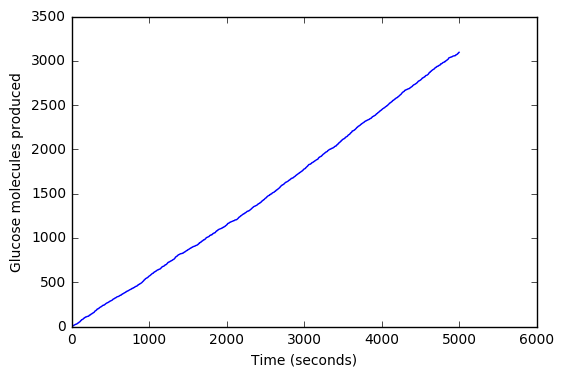

In [133]:
plt.plot(t, R[:,7])
plt.xlabel('Time (seconds)')
plt.ylabel('Glucose molecules produced')

In [115]:
single_grana_region = 1.2*1.187e-7*1.1**2*1.6e-13 - 1.9e-20
total_vol = 60*single_grana_region
total_vol/3.3e-17

0.01559342545454546

In [119]:
photosystems_per_thylakoid = 7e8/300/60/15 # ~ 2500

2592.5925925925926